In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

In [2]:
data= pd.read_csv('bank.csv')

In [68]:
newtest=pd.read_csv('bank.csv')

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [69]:
newtest.shape

(11162, 17)

In [4]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [5]:
#Let's see how 'deposit' column value varies depending on other categorical columns' values:

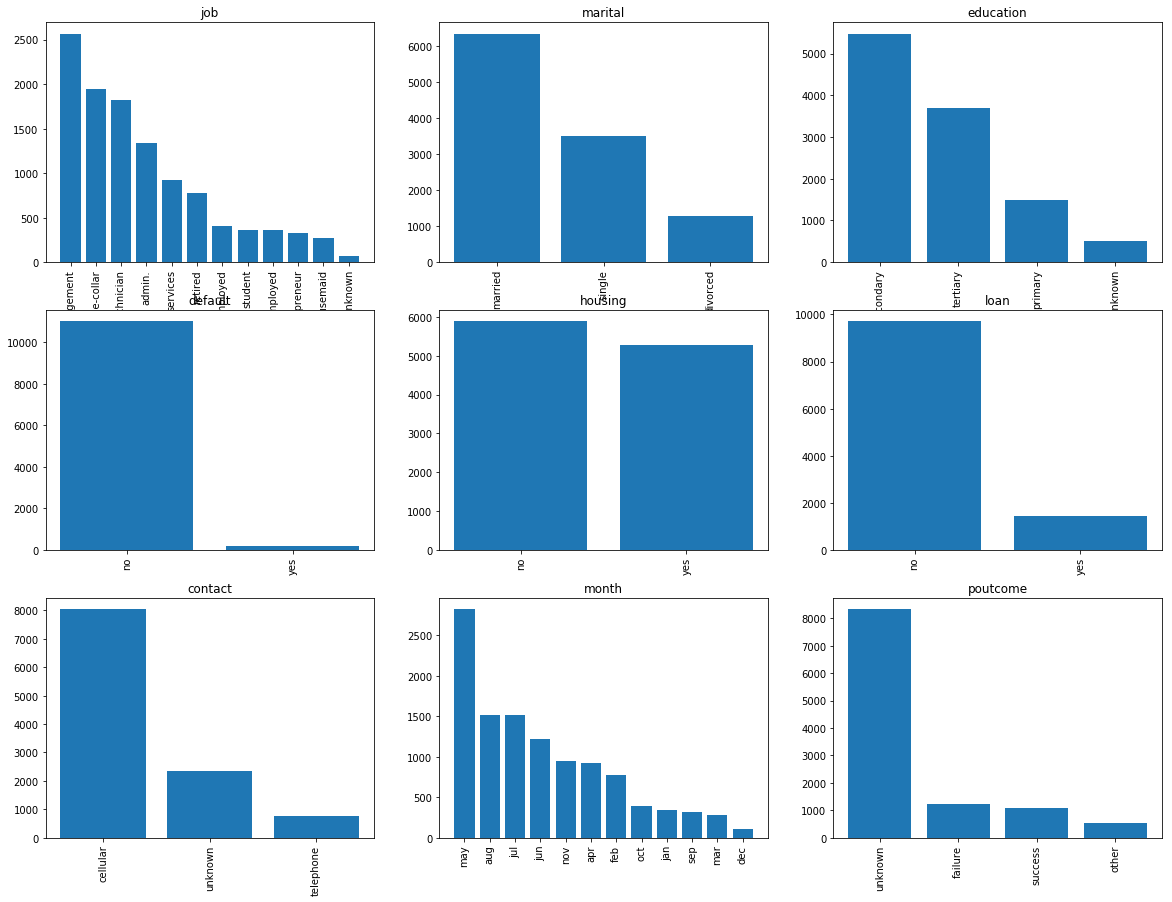

In [6]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = data[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

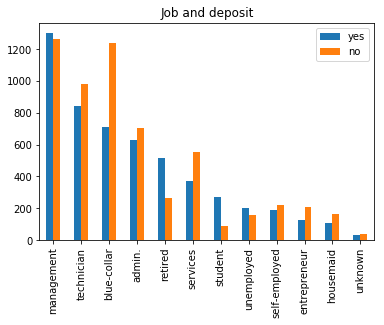

In [7]:
j_df = pd.DataFrame()

j_df['yes'] = data[data['deposit'] == 'yes']['job'].value_counts()
j_df['no'] = data[data['deposit'] == 'no']['job'].value_counts()

j_df.plot.bar(title = 'Job and deposit')

In [45]:
j_df

,yes,no
management,1301,1265
technician,840,983
blue-collar,708,1236
admin.,631,703
retired,516,262
services,369,554
student,269,91
unemployed,202,155
self-employed,187,218
entrepreneur,123,205


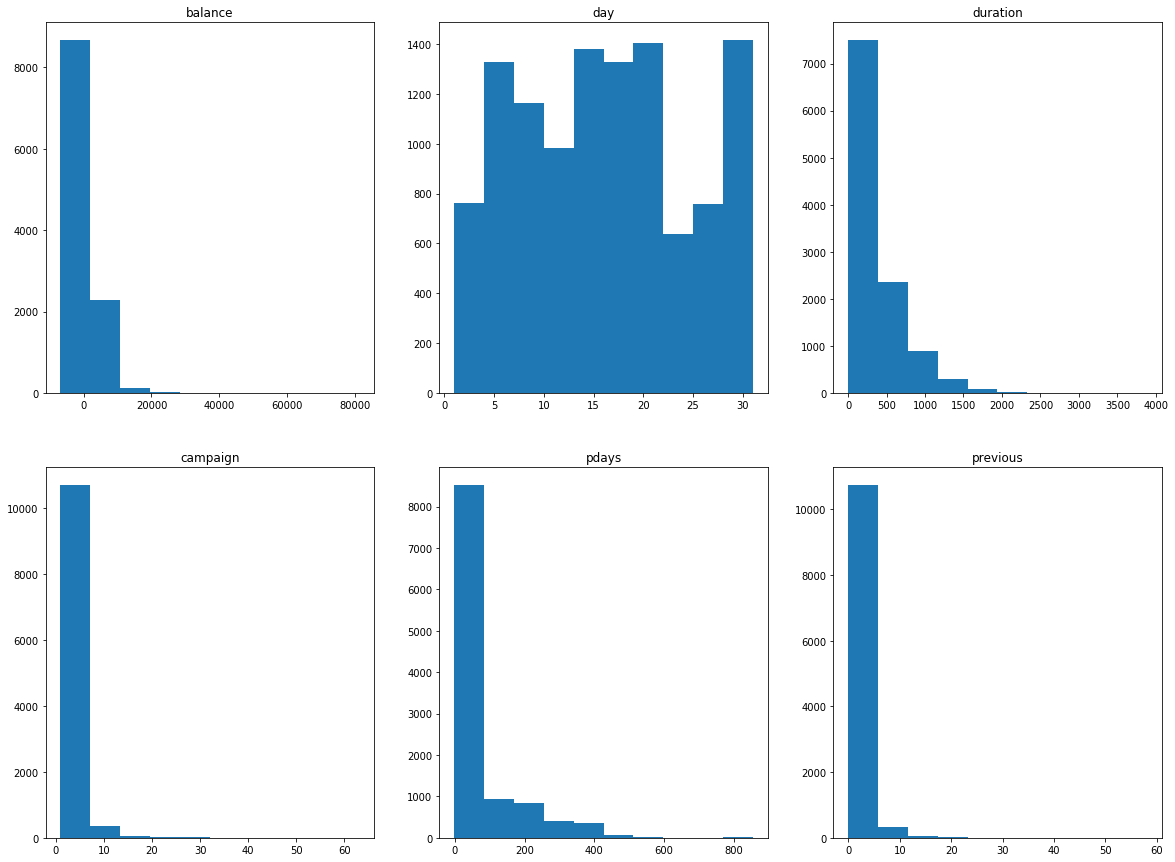

In [8]:
num_columns = ['balance', 'day','duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(data[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

In [9]:
data[['pdays', 'campaign', 'previous']].describe()
# we see that mean of pdays is 51, campaign 2.5, previous 0.8

,pdays,campaign,previous
count,11162.000000,11162.000000,11162.000000
mean,51.330407,2.508421,0.832557
std,108.758282,2.722077,2.292007
min,-1.000000,1.000000,0.000000
25%,-1.000000,1.000000,0.000000
50%,-1.000000,2.000000,0.000000
75%,20.750000,3.000000,1.000000
max,854.000000,63.000000,58.000000


In [10]:
##################### DATA CLEANING ################

In [11]:
data=pd.get_dummies(data,columns=['job','marital','education','contact','month','poutcome'],
                    prefix=['job','marital','education','contact','month','poutcome'])

In [70]:
data

,age,default,balance,housing,loan,day,duration,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,campaign_cleaned,previous_cleaned
0,59,0,2343,1,0,5,1042,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1.0,0.0
1,56,0,45,0,0,5,1467,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1.0,0.0
2,41,0,1270,1,0,5,1389,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1.0,0.0
3,55,0,2476,1,0,5,579,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1.0,0.0
4,54,0,184,0,0,5,673,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2.0,0.0
5,42,0,0,1,1,5,562,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2.0,0.0
6,56,0,830,1,1,6,1201,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1.0,0.0
7,60,0,545,1,0,6,1030,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1.0,0.0
8,37,0,1,1,0,6,608,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1.0,0.0
9,28,0,5090,1,0,6,1297,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,3.0,0.0


In [12]:
data=data.drop(columns=['pdays'])

In [71]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['default'] = labelencoder.fit_transform(data['default'])
data['housing'] = labelencoder.fit_transform(data['housing'])
data['loan'] = labelencoder.fit_transform(data['loan'])
data['deposit'] = labelencoder.fit_transform(data['deposit'])

In [14]:
def get_correct_values(row, column_name, threshold, df):
    ''' Returns mean value if value in column_name is above threshold'''
    if row[column_name] <= threshold:
        return row[column_name]
    else:
        mean = df[df[column_name] <= threshold][column_name].mean()
        return mean
    
    
#impute incorrect values and drop original columns
data['campaign_cleaned'] = data.apply(lambda row: get_correct_values(row, 'campaign', 34, data),axis=1)
data['previous_cleaned'] = data.apply(lambda row: get_correct_values(row, 'previous', 34, data),axis=1)
    
data = data.drop(columns = ['campaign', 'previous'])    

In [15]:
X = data.drop(columns = 'deposit')
y = data[['deposit']]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf= RandomForestClassifier()

In [27]:
rf.fit(X_train,y_train)

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
cross_val_score(rf,X_train,y_train.values.ravel(),cv=5).mean()

0.8200444040805778

In [37]:
rf.score(X_test,y_test)

0.8283069573006868

In [38]:
xgb.score(X_test,y_test)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.857270827112571

In [39]:
rf_predict = rf.predict(X_test)

In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_test, rf_predict))

             precision    recall  f1-score   support

          0       0.83      0.84      0.84      1742
          1       0.82      0.82      0.82      1607

avg / total       0.83      0.83      0.83      3349



In [43]:
rf_xgb_pred=xgb.predict(X_test)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [55]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [54]:

print(classification_report(y_test,rf_xgb_pred))

             precision    recall  f1-score   support

          0       0.88      0.84      0.86      1742
          1       0.83      0.88      0.86      1607

avg / total       0.86      0.86      0.86      3349



In [18]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train.squeeze().values)

#calculate and print scores for the model for top 15 features
y_train_preds = xgb.predict(X_train)

y_test_preds = xgb.predict(X_test)

print('XGB accuracy score for train: %.3f: test: %.3f' % (accuracy_score(y_train, y_train_preds),
                                                          accuracy_score(y_test, y_test_preds)))

XGB accuracy score for train: 0.910: test: 0.857


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
cross_val_score(xgb,X,y.values.ravel(),cv=5).mean()

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

0.8143823311898902

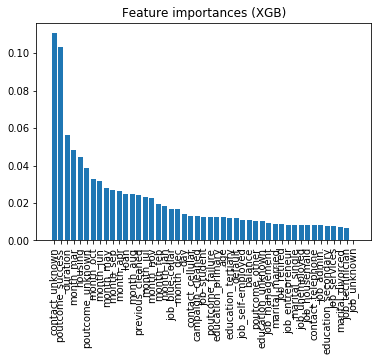

In [21]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')

plt.show()

In [22]:
'''
As we can see from the diagram showing feature importances, the most important features are:

1)Customer's account balance,
2)Customer's age,
3)Number of contacts performed during this campaign and contact duration,
4)Number of contacts performed before this campaign.

So the main outcomes of the modelling are:

Customers of greater age are more likely to subscribe for the term deposit.
Customers with greater account balance are more likely to subscribe for the term deposit.
Number of contacts with the customers really matters. Too many contacts with the customer could make him decline the offer.'''

"\nAs we can see from the diagram showing feature importances, the most important features are:\n\n1)Customer's account balance,\n2)Customer's age,\n3)Number of contacts performed during this campaign and contact duration,\n4)Number of contacts performed before this campaign.\n\nSo the main outcomes of the modelling are:\n\nCustomers of greater age are more likely to subscribe for the term deposit.\nCustomers with greater account balance are more likely to subscribe for the term deposit.\nNumber of contacts with the customers really matters. Too many contacts with the customer could make him decline the offer."

In [23]:
X_train.values

array([[5.700e+01, 0.000e+00, 9.500e+02, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [3.400e+01, 0.000e+00, 9.250e+02, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [4.100e+01, 0.000e+00, 7.500e+01, ..., 1.000e+00, 9.000e+00,
        0.000e+00],
       ...,
       [3.500e+01, 0.000e+00, 1.144e+03, ..., 1.000e+00, 1.300e+01,
        0.000e+00],
       [5.100e+01, 0.000e+00, 7.460e+02, ..., 1.000e+00, 5.000e+00,
        0.000e+00],
       [3.000e+01, 0.000e+00, 2.000e+00, ..., 1.000e+00, 1.000e+00,
        0.000e+00]])